In [110]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('/adult.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [3]:
# removing unwanted columns
df.drop(['fnlwgt','educational-num','relationship','capital-gain','capital-loss'], axis = 1, inplace = True)

In [6]:
df.describe()

,age,hours-per-week
count,48842.000000,48842.000000
mean,38.643585,40.422382
std,13.710510,12.391444
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [7]:
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,White,Female,30,United-States,<=50K


In [8]:
df.tail()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K
48841,52,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,>50K


In [9]:
df.shape

(48842, 10)

# **Univariate Analysis**

## **Analysis of AGE column**

In [10]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [11]:
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [12]:
df['age'].unique().shape

(74,)

In [13]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [14]:
df['age'].isnull().sum()

0

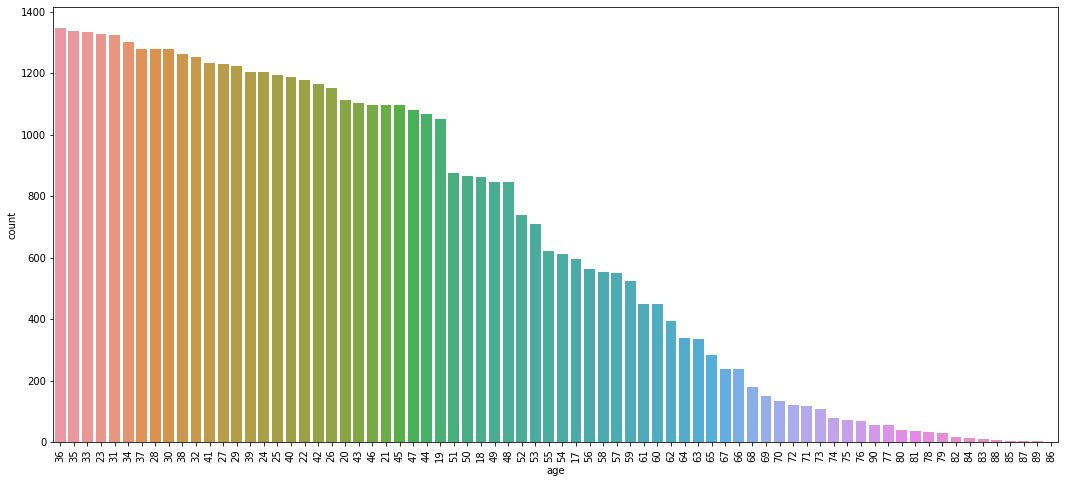

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['age'],order=df['age'].value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.show()

people with age 36 are in maximum number.

people with age 86 are in minimum number. 

In [17]:
# To find outliers we are using IQR

def iqr(df):
    outliers=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    print("Lower limit is: ",Lower_tail)
    print("Upper limit is: ",Upper_tail)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            outliers.append(i)
    return outliers

<Figure size 576x576 with 0 Axes>

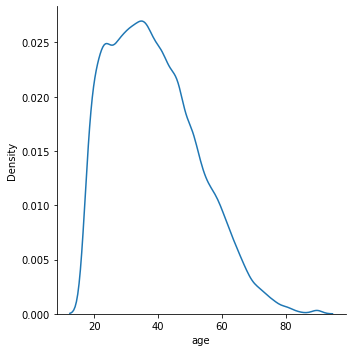

In [18]:
#Plotting the displot to see that the data is normally distributed or not

plt.figure(figsize=(8,8))
sns.displot(x=df['age'],kind='kde')

the data seems to be symmetric with some outliers

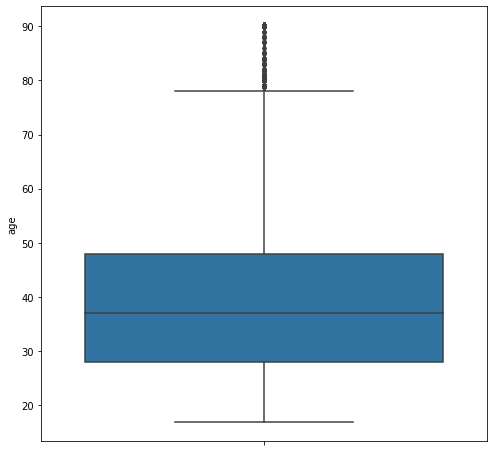

In [19]:

#plotting box plot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=df['age'])

In [20]:
# Finding outliers in the data

age_outliers=iqr(df['age'])
print(len(age_outliers))
print(age_outliers)
print(min(age_outliers))

Lower limit is:  -2.0
Upper limit is:  78.0
216
[79, 80, 90, 79, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 90, 79, 79, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 79, 81, 79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]
79


In [21]:
#removing outliers in the data
df['age']=df[df['age']<80]

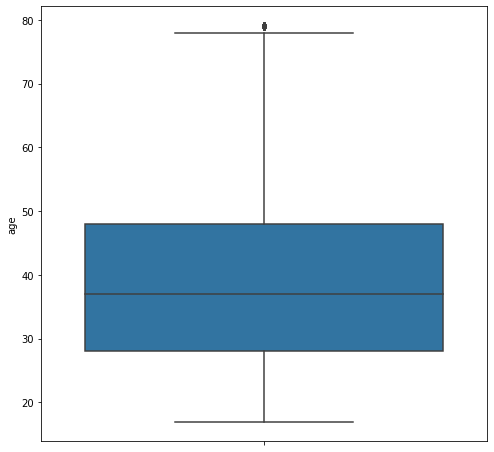

In [22]:
#Plotting box plot to see outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=df['age'])

we have removed maximum outliers from the data

In [23]:
#To see how many null values are there in the data

df['age'].isnull().sum()

186

In [24]:
# Filling null values with median

df['age']=df['age'].fillna(df['age'].median())

In [25]:
df['age'].isnull().sum()

0

<Figure size 720x720 with 0 Axes>

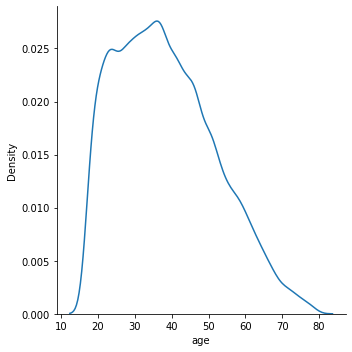

In [26]:
plt.figure(figsize=(10,10))
sns.displot(x = df['age'], kind='kde')

1)We can see that after removing the outliers and inputing nan values with median our symmetry of data has improved a lot.

2)Our distribution also looks preety much normally distribured.

## Analysing workclass

In [27]:
df['workclass'].describe()

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

In [28]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [29]:
df['workclass'].isnull().sum()

0

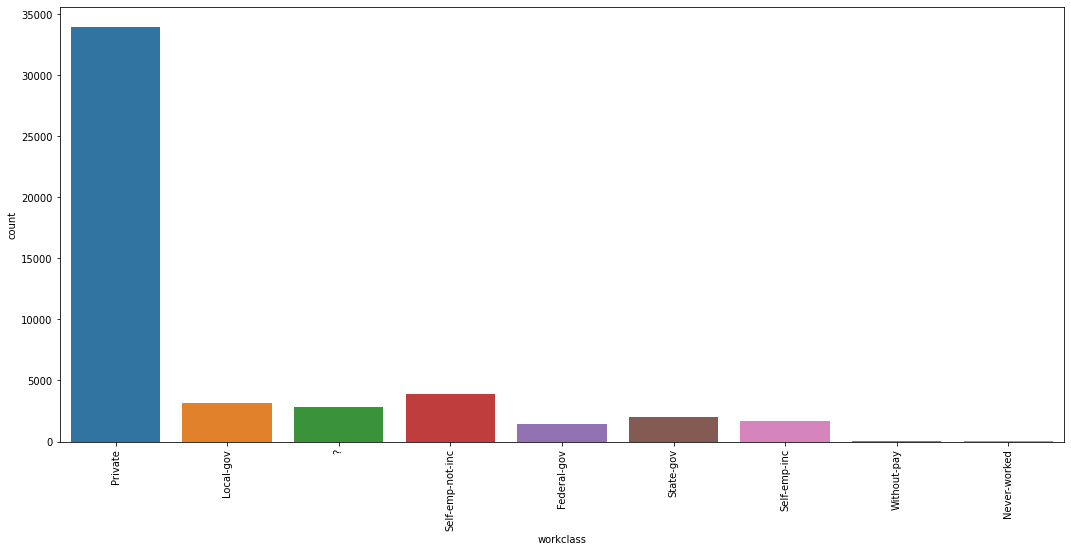

In [30]:
plt.figure(figsize=(18,8))
sns.countplot(x = df['workclass'])
plt.xticks(rotation = 90)
plt.show()

most of the people from the private sector

there are also some missing values "?"

In [31]:
df['workclass'] = df['workclass'].replace('?',np.nan)

In [32]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [33]:
df['workclass'].isnull().sum()

2799

In [34]:
df['workclass'].mode()

0    Private
dtype: object

In [35]:
mode = df['workclass'].mode()[0]

In [36]:
#filling missing values with mode
df['workclass'].replace(np.nan,'Private',inplace=True)

In [37]:
df['workclass'].isnull().sum()

0

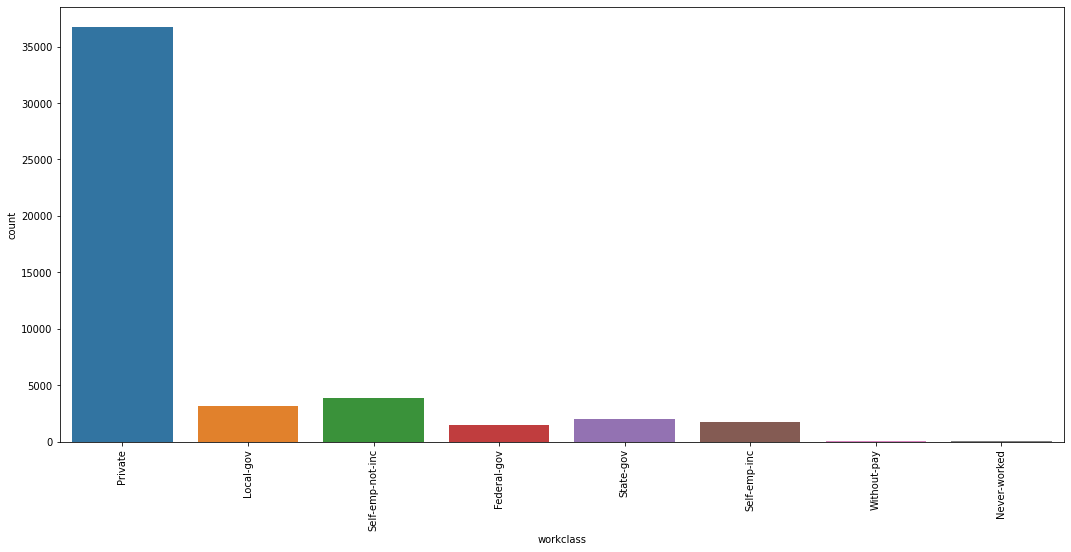

In [38]:
plt.figure(figsize=(18,8))
sns.countplot(x = df['workclass'])
plt.xticks(rotation = 90)
plt.show()

## Analysis of education

In [39]:
df['education'].describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

In [40]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [41]:
df['education'].isnull().sum()

0

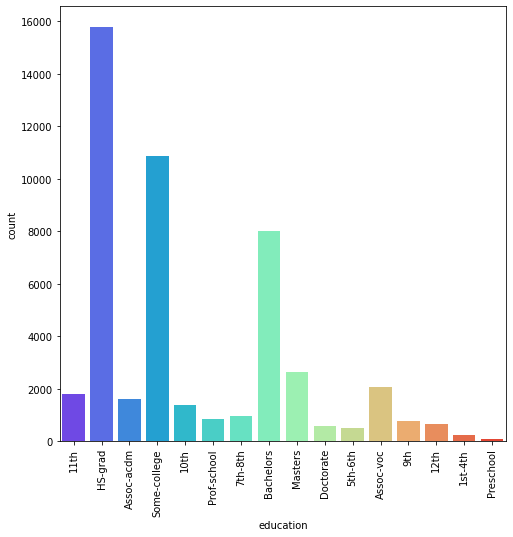

In [42]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['education'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

 Most of the people have completed HS-grad.

## Analysing Occupation

In [43]:
df['occupation'].describe()

count              48842
unique                15
top       Prof-specialty
freq                6172
Name: occupation, dtype: object

In [44]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

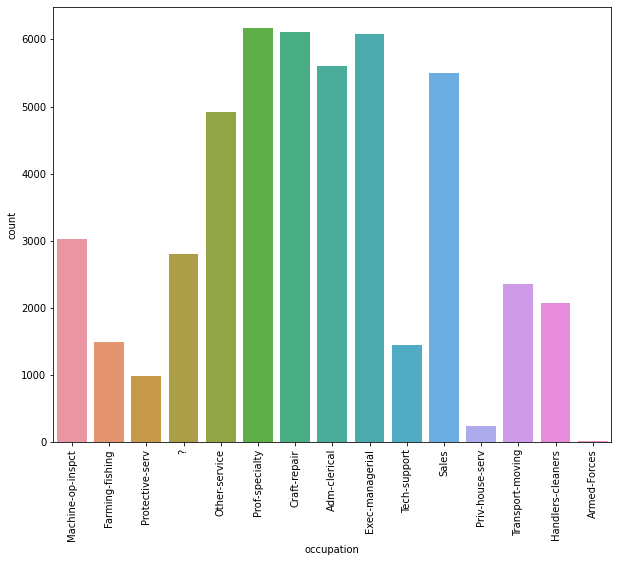

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(x = df['occupation'])
plt.xticks(rotation=90)
plt.show()

most of the people are from prof-speciality,craft-repair and exec-managerial

we can see that there is also some missing values '?'


In [46]:
df['occupation'].mode()[0]


'Prof-specialty'

In [47]:
df['occupation'].replace('?','Prof-specialty',inplace=True)

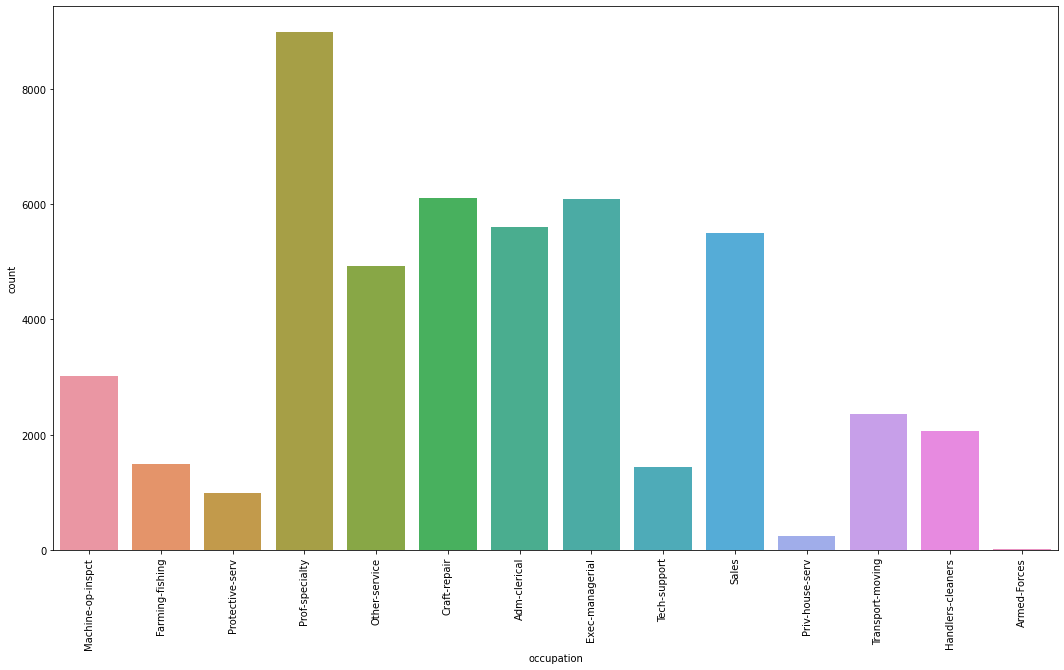

In [51]:
plt.figure(figsize=(18,10))
sns.countplot(x=df['occupation'])
plt.xticks(rotation=90)
plt.show()

we have removed all the missing values

## Analysing Relationship

In [52]:
df['race'].describe()

count     48842
unique        5
top       White
freq      41762
Name: race, dtype: object

In [53]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

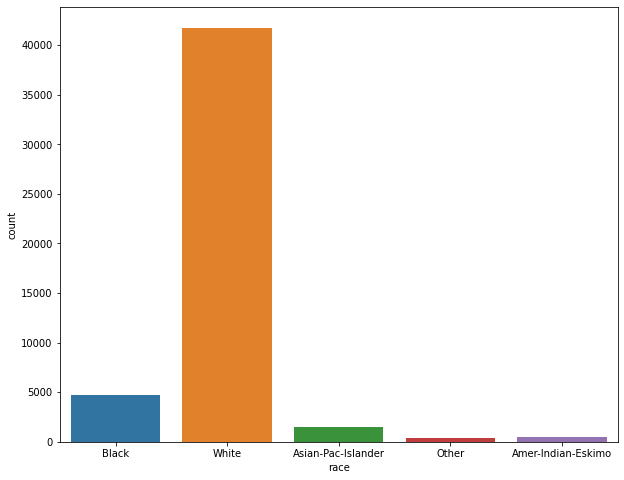

In [54]:
#Plotting the countplot

plt.figure(figsize=(10,8))
sns.countplot(x=df['race'])
plt.show()

## Analysing Gender

In [55]:
df['gender'].describe()

count     48842
unique        2
top        Male
freq      32650
Name: gender, dtype: object

In [56]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

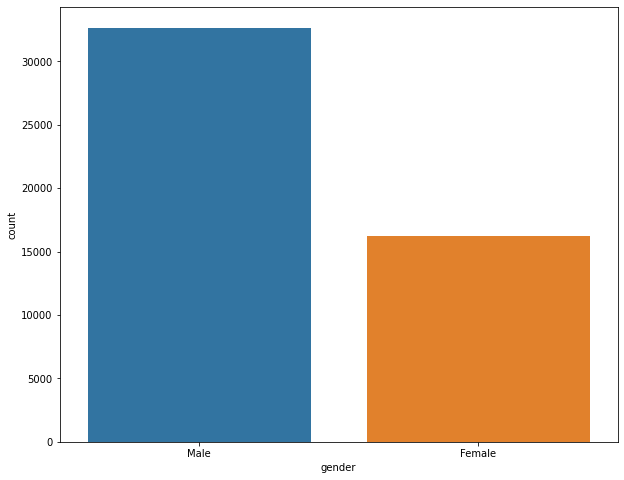

In [57]:
#countplot
plt.figure(figsize=(10,8))
sns.countplot(x = df['gender'])
plt.show()

## Analysing hours per week

In [62]:
df['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [63]:
df['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

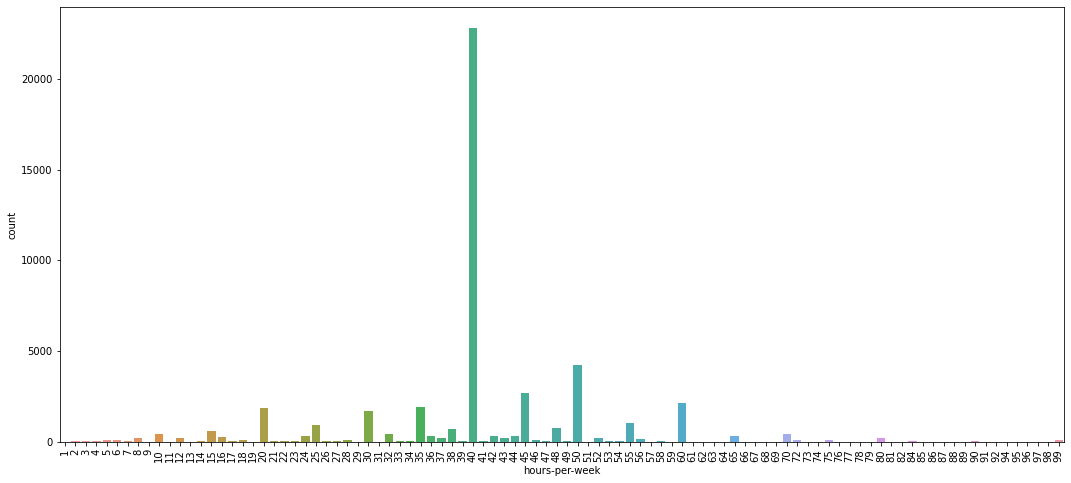

In [67]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['hours-per-week'])
plt.xticks(rotation=90)
plt.show()

we can clearly see that maximum people work 40 hours/week

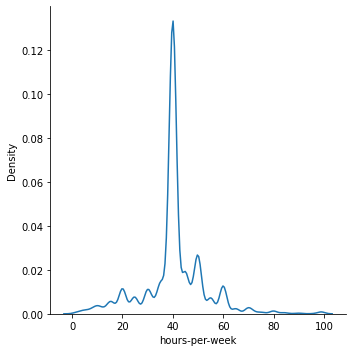

In [70]:
sns.displot(x = df['hours-per-week'],kind='kde')
plt.show()

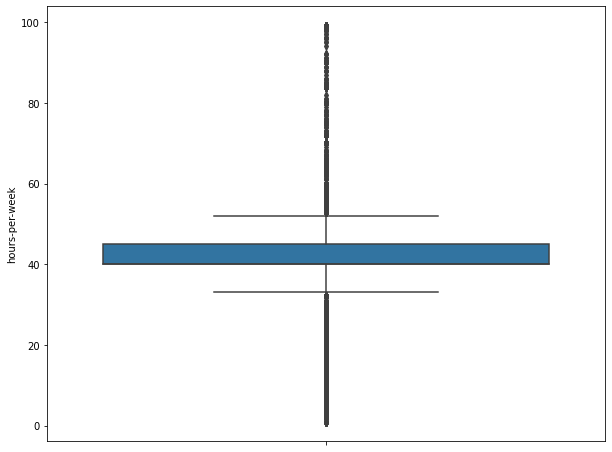

In [71]:
#Plotting box-plot to see the outliers

plt.figure(figsize=(10,8))
sns.boxplot(y=df['hours-per-week'])

In [72]:
hours_outliers=iqr(df['hours-per-week'])
print(hours_outliers)

Lower limit is:  32.5
Upper limit is:  52.5
[30, 30, 32, 10, 25, 30, 20, 6, 90, 20, 54, 60, 32, 18, 20, 24, 60, 54, 60, 20, 30, 10, 56, 10, 25, 20, 10, 18, 28, 16, 28, 20, 24, 60, 25, 30, 25, 60, 60, 22, 55, 30, 30, 30, 30, 14, 32, 20, 25, 30, 16, 25, 60, 55, 8, 55, 54, 20, 55, 12, 32, 32, 30, 60, 28, 60, 12, 32, 20, 70, 15, 20, 25, 30, 20, 75, 24, 60, 25, 55, 55, 32, 60, 16, 60, 84, 60, 25, 15, 60, 20, 55, 80, 30, 12, 84, 80, 60, 25, 25, 70, 60, 8, 68, 10, 15, 99, 55, 60, 16, 20, 25, 65, 55, 24, 70, 25, 30, 20, 20, 55, 5, 60, 60, 20, 55, 65, 60, 20, 10, 75, 20, 32, 28, 17, 30, 28, 60, 60, 55, 60, 10, 10, 65, 18, 60, 72, 12, 60, 30, 60, 20, 60, 60, 25, 60, 25, 8, 60, 54, 65, 30, 80, 30, 20, 28, 55, 55, 60, 56, 30, 30, 53, 10, 60, 30, 10, 25, 25, 20, 20, 20, 25, 55, 20, 32, 10, 29, 32, 75, 24, 20, 20, 70, 55, 55, 30, 25, 10, 80, 60, 16, 25, 65, 60, 60, 96, 25, 20, 55, 30, 28, 60, 55, 28, 21, 8, 60, 60, 15, 20, 10, 30, 25, 90, 15, 5, 16, 25, 60, 25, 25, 55, 10, 30, 8, 18, 3, 16, 20, 30, 

In [74]:

#Removing the outliers

df['hours-per-week']=df[(df['hours-per-week']> 32.5) & (df['hours-per-week']<52.5)]

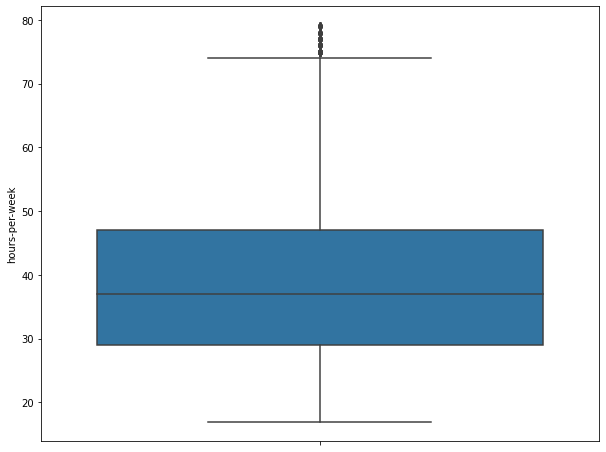

In [76]:
#Plotting box-plot to see the outliers

plt.figure(figsize=(10,8))
sns.boxplot(y=df['hours-per-week'])

In [81]:
df['hours-per-week'].isnull().sum()

13496

In [85]:
df['hours-per-week']=df['hours-per-week'].fillna(df['hours-per-week'].median())

In [86]:
df['hours-per-week'].isnull().sum()

0

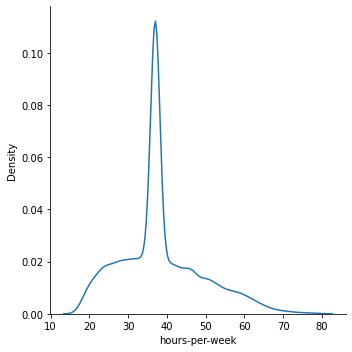

In [87]:
sns.displot(x = df['hours-per-week'],kind='kde')
plt.show()

now we see that we have removed most of the outliers

## Analysing Native Country

In [88]:
df['native-country'].describe()

count             48842
unique               42
top       United-States
freq              43832
Name: native-country, dtype: object

In [89]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


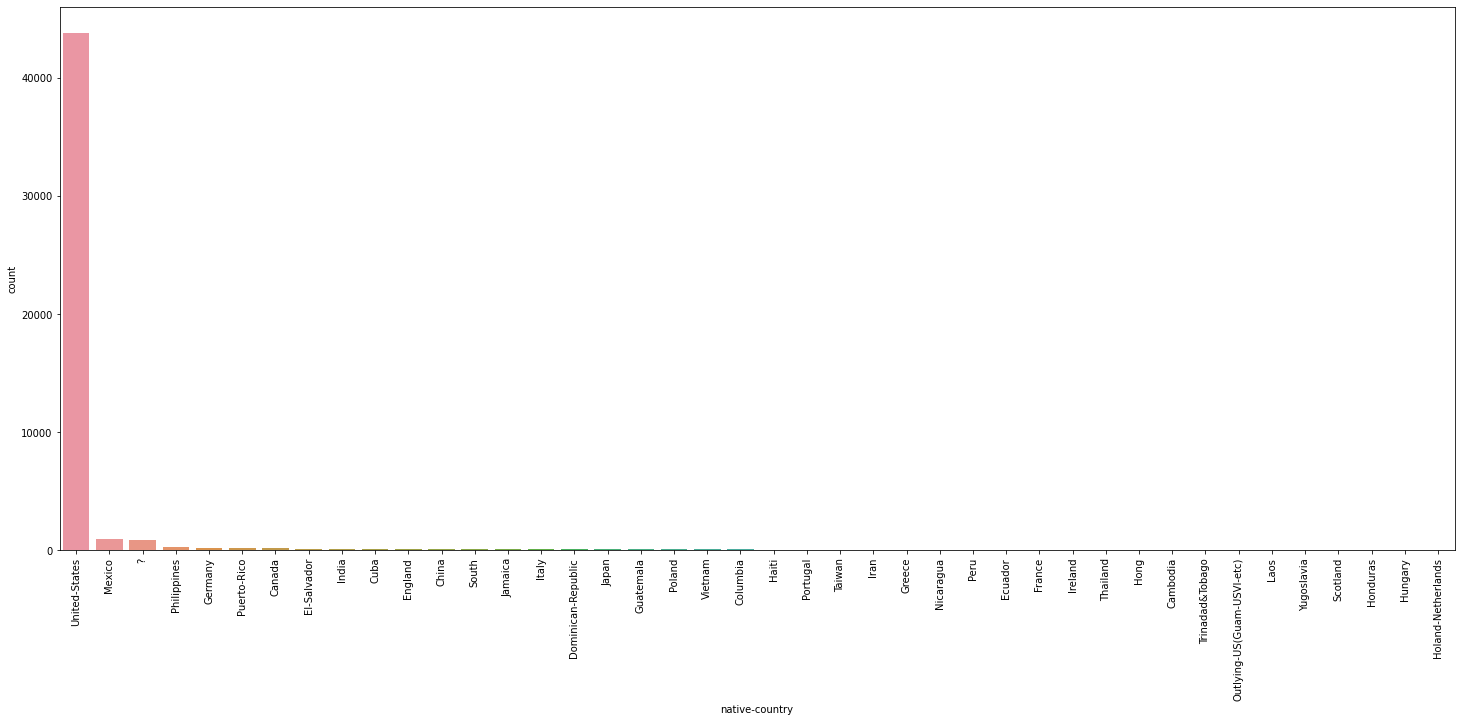

In [94]:
plt.figure(figsize=(25,10))
sns.countplot(df['native-country'],order=df['native-country'].value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.show()

most of the people from united states
we also some missing values in the data

In [95]:
df['native-country'].replace("?",'United-States',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


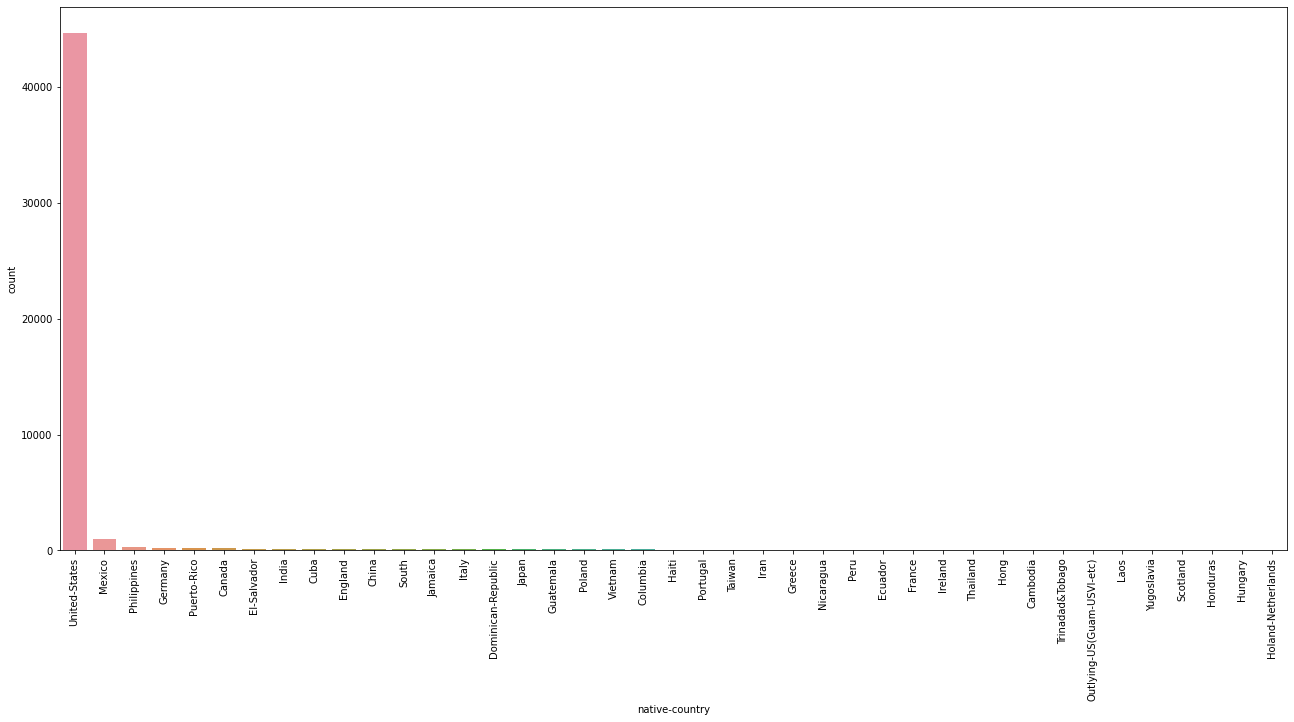

In [97]:
plt.figure(figsize=(22,10))
sns.countplot(df['native-country'],order=df['native-country'].value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.show()

now we have removed all the missing values

## Analysing income

In [99]:
df['income'].describe()

count     48842
unique        2
top       <=50K
freq      37155
Name: income, dtype: object

In [59]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

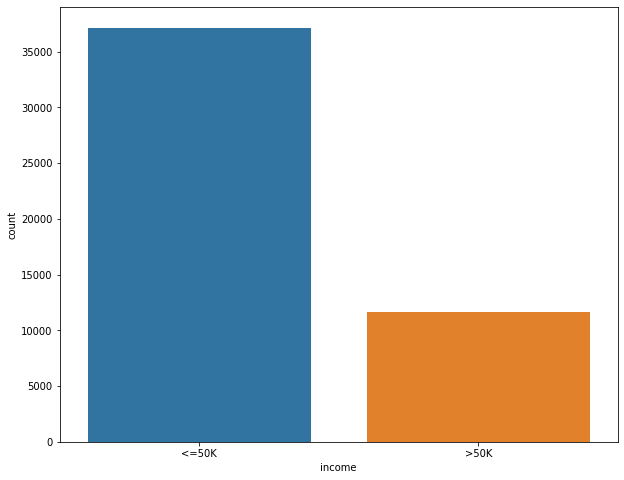

In [100]:
#countplot
plt.figure(figsize=(10,8))
sns.countplot(x = df['income'])
plt.show()

In [102]:
# Mapping the categorical variables

df['income']=df['income'].map({'<=50K':0,'>50K':1})

<Figure size 576x576 with 0 Axes>

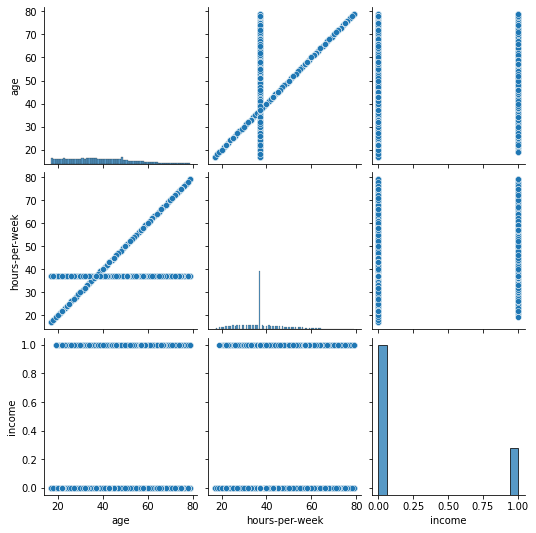

In [103]:
# Making pairplot

plt.figure(figsize=(8,8))
sns.pairplot(df)

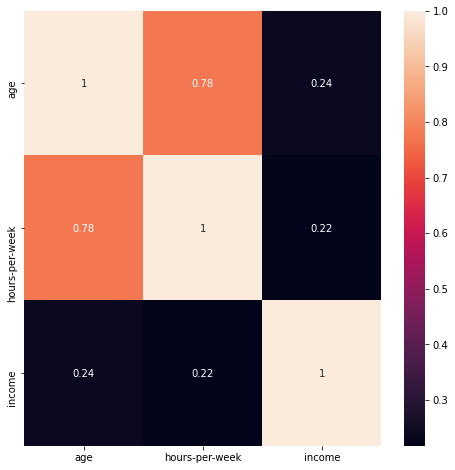

In [104]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

there is a strong correlation between age and hours-per-week

In [115]:
pd.crosstab(df['gender'],df['income'])

income,0,1
gender,,
Female,14423,1769
Male,22732,9918


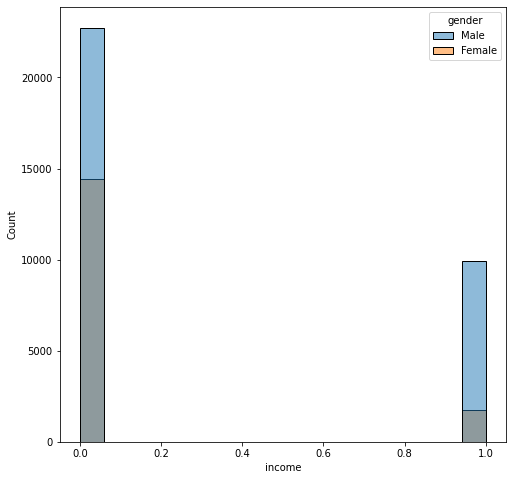

In [116]:
plt.figure(figsize=(8,8))
sns.histplot(x=df['income'],hue=df['gender'])

In [117]:
pd.crosstab(df['hours-per-week'],df['income'])

income,0,1
hours-per-week,,
17.0,94,0
18.0,233,0
19.0,439,1
20.0,587,1
21.0,666,5
...,...,...
75.0,17,10
76.0,13,4
77.0,14,4


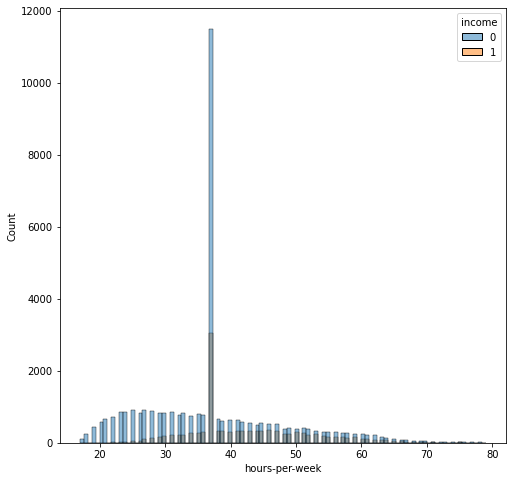

In [121]:
plt.figure(figsize=(8,8))
sns.histplot(x=df['hours-per-week'],hue=df['income'])

In [122]:
pd.crosstab(df['age'],df['income'])

income,0,1
age,,
17.0,595,0
18.0,862,0
19.0,1050,3
20.0,1112,1
21.0,1090,6
...,...,...
75.0,59,13
76.0,61,8
77.0,46,8


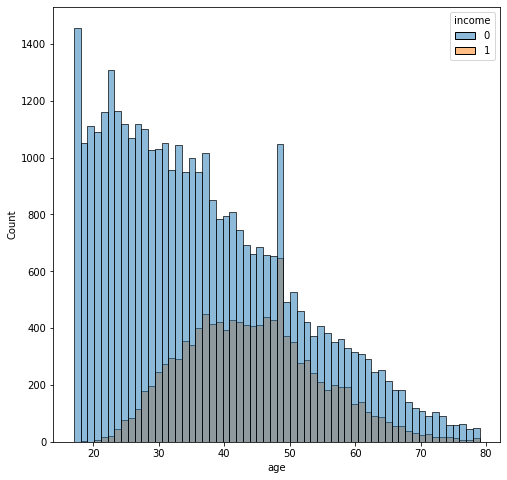

In [124]:
plt.figure(figsize=(8,8))
sns.histplot(x=df['age'],hue=df['income'])

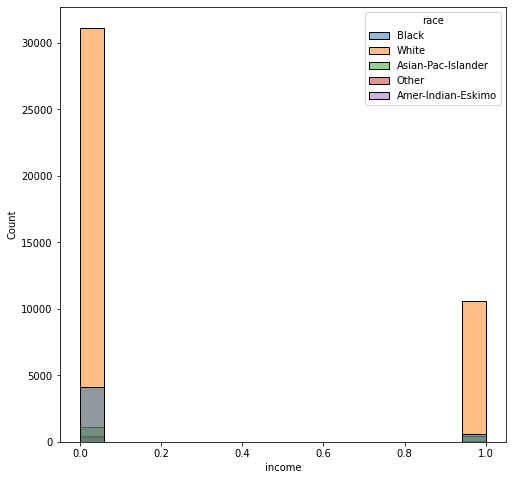

In [120]:
plt.figure(figsize=(8,8))
sns.histplot(x=df['income'],hue=df['race'])

In [126]:
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [127]:
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Black,0,25.0,United-States,0
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,0,38.0,United-States,0
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,0,28.0,United-States,1
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,0,44.0,United-States,1
4,18.0,Private,Some-college,Never-married,Prof-specialty,White,1,37.0,United-States,0


In [129]:
df=pd.get_dummies(df,drop_first=True)

In [130]:
df.head()

,age,gender,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,0,25.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,0,38.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,0,28.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44.0,0,44.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18.0,1,37.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [131]:
df.isnull().sum()

age                               0
gender                            0
hours-per-week                    0
income                            0
workclass_Local-gov               0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 89, dtype: int64

In [132]:
# Splitting the data into features and target

x=df.drop(['income'],axis=1)
y=df[['income']]

In [133]:
# Splitting the data into test and train 

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [134]:
import warnings
warnings.filterwarnings('ignore')

def stratifiedModelling(x,y,lg):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  lst_accu_stratified = []

  for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lg.score(x_test_fold, y_test_fold))
  print("List of accuracy are: ",lst_accu_stratified)
  print("The mean accuracy is: ",sum(lst_accu_stratified)/len(lst_accu_stratified))
  y_predict=lg.predict(x_test_fold)
  print(f"The accuracy score is {accuracy_score(y_test_fold,y_predict)}")
  print("The Classification report is:")
  print(classification_report(y_test_fold,y_predict))
  plt.figure(figsize=(8,8))
  sns.heatmap(confusion_matrix(y_test_fold,y_predict),annot=True)

## Logistic Regression

List of accuracy are:  [0.8257932446264074, 0.8241555783009212, 0.8341523341523341, 0.8325143325143325, 0.8333333333333334, 0.826986076986077, 0.8257575757575758, 0.8294430794430795, 0.8212530712530712, 0.8364045864045864]
The mean accuracy is:  0.8289793212771718
The accuracy score is 0.8364045864045864
The Classification report is:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3715
           1       0.71      0.54      0.61      1169

    accuracy                           0.84      4884
   macro avg       0.79      0.74      0.76      4884
weighted avg       0.83      0.84      0.83      4884



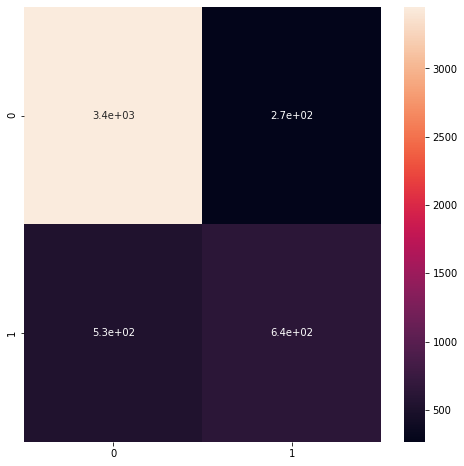

In [135]:

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

stratifiedModelling(x,y,lg)

## Decision Tree Classifier

List of accuracy are:  [0.7866939611054248, 0.7920163766632549, 0.7915642915642915, 0.7932022932022932, 0.797911547911548, 0.7966830466830467, 0.7886977886977887, 0.7893120393120393, 0.7977067977067978, 0.7921785421785422]
The mean accuracy is:  0.7925966685025028
The accuracy score is 0.7921785421785422
The Classification report is:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3715
           1       0.57      0.51      0.54      1169

    accuracy                           0.79      4884
   macro avg       0.71      0.70      0.70      4884
weighted avg       0.78      0.79      0.79      4884



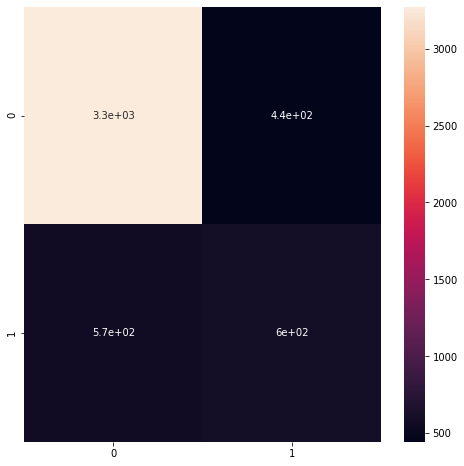

In [136]:

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
stratifiedModelling(x,y,tree)

## Random Forest Classifier

List of accuracy are:  [0.7606960081883316, 0.7606960081883316, 0.7608517608517609, 0.7608517608517609, 0.7608517608517609, 0.7606470106470107, 0.7606470106470107, 0.7606470106470107, 0.7606470106470107, 0.7606470106470107]
The mean accuracy is:  0.7607182352167
The accuracy score is 0.7606470106470107
The Classification report is:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3715
           1       0.00      0.00      0.00      1169

    accuracy                           0.76      4884
   macro avg       0.38      0.50      0.43      4884
weighted avg       0.58      0.76      0.66      4884



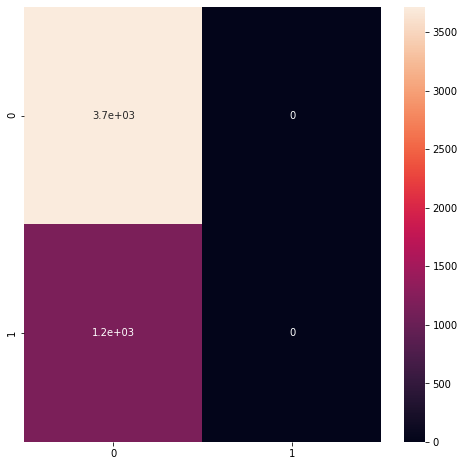

In [137]:
from sklearn.ensemble import RandomForestClassifier

rdmforest = RandomForestClassifier(max_depth=2, random_state=42)
stratifiedModelling(x,y,rdmforest)

# among all these models logistic regression gives best accuracy which is 0.84